In [1]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

In [5]:
df = pd.read_pickle('emotions_dataset.pkl')


In [5]:
df.head()

,Original_image,face_land_marks,im_close_up,label
0,"[[[165, 165, 162], [165, 166, 161], [165, 166,...","[{'chin': [(62, 83), (62, 88), (62, 92), (63, ...","[[[[160 162 161], [160 162 161], [160 162 161]...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[{'chin': [(62, 83), (62, 87), (63, 92), (63, ...","[[[[160 162 160], [161 162 161], [160 161 160]...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[{'chin': [(63, 82), (63, 87), (63, 91), (63, ...","[[[[159 161 158], [160 162 159], [161 162 160]...",bored
3,"[[[165, 166, 162], [165, 165, 163], [165, 165,...","[{'chin': [(63, 83), (63, 87), (63, 92), (63, ...","[[[[159 161 158], [161 163 160], [155 157 154]...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[{'chin': [(63, 82), (63, 87), (63, 91), (63, ...","[[[[160 162 159], [161 163 161], [152 154 151]...",bored


In [6]:
df_sample = df.sample(10)
df_sample.head()

,Original_image,face_land_marks,im_close_up,label
834,"[[[169, 171, 167], [171, 170, 165], [170, 171,...","[{'chin': [(52, 85), (52, 92), (54, 98), (56, ...","[[[[171 173 168], [172 173 169], [175 177 174]...",bored
2735,"[[[161, 171, 172], [160, 170, 171], [160, 170,...","[{'chin': [(60, 85), (61, 91), (61, 96), (63, ...","[[[[16 14 15], [17 16 17], [13 13 13], [11 11 ...",engaged
2940,"[[[212, 227, 229], [213, 228, 229], [213, 229,...","[{'chin': [(55, 72), (55, 81), (56, 90), (58, ...","[[[[50 62 73], [46 55 64], [31 40 42], [20 24 ...",engaged
3496,"[[[159, 171, 171], [159, 171, 171], [159, 171,...","[{'chin': [(60, 83), (60, 90), (60, 97), (61, ...","[[[[162 176 178], [161 176 179], [161 175 178]...",excited
2152,"[[[153, 166, 166], [155, 164, 165], [155, 166,...","[{'chin': [(61, 81), (61, 90), (61, 99), (63, ...","[[[[135 86 80], [120 91 83], [27 20 19], [...",engaged


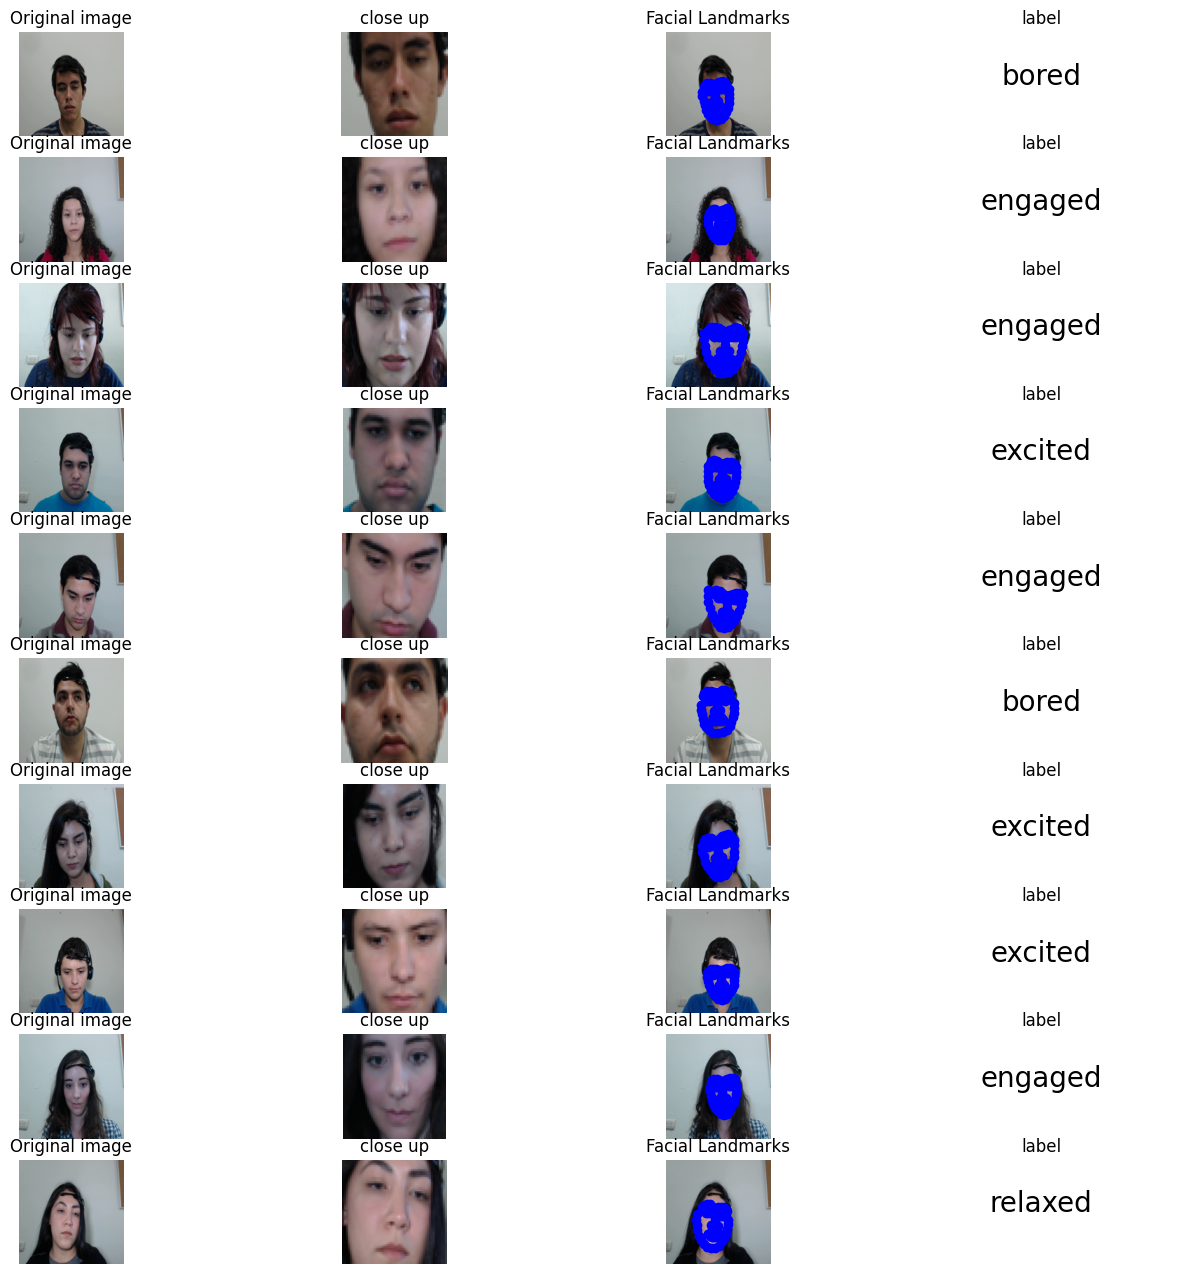

In [7]:
from matplotlib import patches

fig, axes = plt.subplots(nrows=len(df_sample), ncols=4, figsize=(16, 16))

for i, (index, row) in enumerate(df_sample.iterrows()):
    #show original image
    ax0 = axes[i,0]
    ax0.imshow(row['Original_image'])
    ax0.set_title('Original image')
    ax0.axis('off')

    #show image with close_up
    ax1 = axes[i,1]
    ax1.imshow(row['im_close_up'][0])
    ax1.set_title('close up')
    ax1.axis('off')

    #show image face_landmarks
    
    ax2 = axes[i, 2]
    ax2.imshow(row['Original_image'])

    
    for landmark_set in row['face_land_marks']:
        for landmark_tipo, landmark_puntos in landmark_set.items():
            for punto in landmark_puntos:
                ax2.plot(punto[0], punto[1], marker='o', markersize=6, color='blue')

    ax2.set_title("Facial Landmarks")
    ax2.axis('off')


    #show labels
    ax3 = axes[i,3]
    ax3.text(0.5, 0.5, row['label'], fontsize=20, ha='center')
    ax3.set_title('label')
    ax3.axis('off')




In [27]:
# Iterar sobre las filas del DataFrame para verificar el tipo de dato en la columna 'face_land_marks'
for index, row in df.iterrows():
    face_land_marks_type = type(row['im_close_up'])
    print(f"Tipo de dato en la fila {index}: {face_land_marks_type}")


Tipo de dato en la fila 0: <class 'list'>
Tipo de dato en la fila 1: <class 'list'>
Tipo de dato en la fila 2: <class 'list'>
Tipo de dato en la fila 3: <class 'list'>
Tipo de dato en la fila 4: <class 'list'>
Tipo de dato en la fila 5: <class 'list'>
Tipo de dato en la fila 6: <class 'list'>
Tipo de dato en la fila 7: <class 'list'>
Tipo de dato en la fila 8: <class 'list'>
Tipo de dato en la fila 9: <class 'list'>
Tipo de dato en la fila 10: <class 'list'>
Tipo de dato en la fila 11: <class 'list'>
Tipo de dato en la fila 12: <class 'list'>
Tipo de dato en la fila 13: <class 'list'>
Tipo de dato en la fila 14: <class 'list'>
Tipo de dato en la fila 15: <class 'list'>
Tipo de dato en la fila 16: <class 'list'>
Tipo de dato en la fila 17: <class 'list'>
Tipo de dato en la fila 18: <class 'list'>
Tipo de dato en la fila 19: <class 'list'>
Tipo de dato en la fila 20: <class 'list'>
Tipo de dato en la fila 21: <class 'list'>
Tipo de dato en la fila 22: <class 'list'>
Tipo de dato en la fi

In [28]:
first_cell_content = df.iloc[0]['im_close_up']
print(first_cell_content)

[array([[[160, 162, 161],
        [160, 162, 161],
        [160, 162, 161],
        ...,
        [118, 119, 119],
        [ 95,  99,  98],
        [163, 166, 165]],

       [[160, 162, 161],
        [160, 162, 161],
        [160, 162, 161],
        ...,
        [ 90,  91,  90],
        [ 64,  67,  67],
        [145, 148, 147]],

       [[160, 162, 161],
        [159, 161, 160],
        [159, 161, 160],
        ...,
        [ 38,  39,  38],
        [ 15,  17,  17],
        [ 97, 101, 101]],

       ...,

       [[146, 148, 145],
        [146, 148, 145],
        [146, 148, 147],
        ...,
        [158, 160, 156],
        [157, 161, 156],
        [157, 162, 156]],

       [[145, 147, 146],
        [145, 147, 145],
        [146, 148, 147],
        ...,
        [157, 159, 154],
        [157, 160, 155],
        [158, 161, 155]],

       [[144, 146, 145],
        [144, 146, 146],
        [145, 147, 146],
        ...,
        [154, 156, 151],
        [156, 158, 153],
        [157, 159, 153]